# Imports

In [1]:
import os
import logging
import pandas as pd
import datetime
import numpy as np
import subprocess

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from matplotlib.pyplot import Polygon
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MinuteLocator
import matplotlib.ticker as ticker

import ipywidgets as widgets
from ipywidgets import interact

from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.palettes import Spectral10

from IPython.display import Image

try:
    from PT3S import dxAndMxHelperFcts
except:
    import dxAndMxHelperFcts

try:
    from PT3S import Rm
except:
    import Rm

In [2]:
import importlib

In [3]:
importlib.reload(dxAndMxHelperFcts)

<module 'dxAndMxHelperFcts' from 'c:\\users\\wolters\\3s\\pt3s\\dxAndMxHelperFcts.py'>

# Logging

In [4]:
logger = logging.getLogger()  

logFileName= r"Example3.log" 

loglevel = logging.DEBUG
logging.basicConfig(filename=logFileName
                        ,filemode='w'
                        ,level=loglevel
                        ,format="%(asctime)s ; %(name)-60s ; %(levelname)-7s ; %(message)s")    

fileHandler = logging.FileHandler(logFileName)     

logger.addHandler(fileHandler)

consoleHandler = logging.StreamHandler()
consoleHandler.setFormatter(logging.Formatter("%(levelname)-7s ; %(message)s"))
consoleHandler.setLevel(logging.INFO)
logger.addHandler(consoleHandler)

# Read Model and Results

In [5]:
dbFilename="Example3"
dbFile=os.path.join(os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))
                    +'/Examples/'
                    +dbFilename
                    +'.db3'
)

In [6]:
m=dxAndMxHelperFcts.readDxAndMx(dbFile=dbFile                                 
                                ,preventPklDump=True
                                ,maxRecords=-1
)

INFO    ; Dx.__init__: dbFile (abspath): c:\users\wolters\3s\pt3s\Examples\Example3.db3 exists readable ...
INFO    ; dxAndMxHelperFcts.readDxAndMx: running C:\\3S\Sir3s\SirCalc-90-14-02-10_Potsdam\SirCalc.exe ...
INFO    ; Mx.setResultsToMxsFile: Mxs: ..\Examples\WDExample3\B1\V0\BZ1\M-1-0-1.1.MXS reading ...
INFO    ; dxWithMx.__init__: Example3: processing dx and mx ...


In [7]:
m.V3_AGSN.shape,m.dfAGSN.shape

((537, 52), (528, 10))

# Longitudinal Sections: V3_AGSN

In [8]:
m.V3_AGSN

,Pos,pk,tk,LFDNR,NAME,XL,compNr,nextNODE,OBJTYPE,OBJID,...,"('TMAX', 'KNOT~*~*~*~RHO', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",PH_n,T_n,H_n,RHO_n,mlc_n,"('STAT', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n","('TIME', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n","('TMIN', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n","('TMAX', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n"
0,-1,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-E0,ROHR,5691533564979419761,...,965.700012,4.878388,90.0,5.024506,965.700012,592.984993,592.958713,592.962286,592.958738,602.48758
0,0,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1683S,ROHR,5691533564979419761,...,965.701172,4.800117,89.998016,5.024687,965.701172,592.958713,592.958713,592.962286,592.958738,602.48758
1,1,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1693S,ROHR,5048873293262650113,...,965.702148,4.731768,89.996399,5.024986,965.702148,592.937202,592.937202,592.941546,592.937253,602.419501
2,2,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2163S,ROHR,5715081934973525403,...,965.702637,4.698539,89.995605,5.025103,965.702637,592.926449,592.926449,592.931165,592.926512,602.385399
3,3,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2043S,ROHR,5413647981880727734,...,965.703735,4.629901,89.993744,5.025112,965.703735,592.901884,592.901884,592.907361,592.901971,602.306951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,39,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2583S,ROHR,4621030304810285220,...,983.764526,1.196312,59.871002,3.465572,983.764526,575.536089,575.536089,575.548996,575.537995,582.046941
524,40,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2593S,ROHR,5046251450517706156,...,983.754883,1.09261,59.890289,3.471704,983.754883,575.581644,575.581644,575.595171,575.583339,582.197052
525,41,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2603S,ROHR,5478012163155701568,...,983.745789,1.018315,59.908417,3.477824,983.745789,575.631904,575.631904,575.645893,575.633444,582.361158
526,42,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2613S,ROHR,4968402990875758821,...,983.747681,0.911956,59.904633,3.489146,983.747681,575.729795,575.729795,575.744475,575.731181,582.680754


In [9]:
m.dfAGSN

,Pos,TYPE,ID,pk,tk,LFDNR,NAME,XL,compNr,nextNODE
0,0,ROHR,5691533564979419761,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1683S
1,1,ROHR,5048873293262650113,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1693S
2,2,ROHR,5715081934973525403,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2163S
3,3,ROHR,5413647981880727734,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2043S
4,4,ROHR,5134010500800575790,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2033S
...,...,...,...,...,...,...,...,...,...,...
523,39,ROHR,4621030304810285220,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2583S
524,40,ROHR,5046251450517706156,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2593S
525,41,ROHR,5478012163155701568,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2603S
526,42,ROHR,4968402990875758821,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2613S


In [10]:
m.dfAGSN.columns.to_list()

['Pos', 'TYPE', 'ID', 'pk', 'tk', 'LFDNR', 'NAME', 'XL', 'compNr', 'nextNODE']

In [11]:
m.V3_AGSN.columns.to_list()

['Pos',
 'pk',
 'tk',
 'LFDNR',
 'NAME',
 'XL',
 'compNr',
 'nextNODE',
 'OBJTYPE',
 'OBJID',
 'L',
 'DN',
 'Am2',
 'Vm3',
 'NAME_CONT',
 'NAME_i',
 'NAME_k',
 'ZKOR_n',
 'BESCHREIBUNG_n',
 'KVR_n',
 'LSum',
 'direction',
 ('STAT',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TIME',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TMIN',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 ('TMAX',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 'QM',
 "('STAT', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TIME', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TMIN', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('TMAX', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('STA

# Section No. 1

In [12]:
dfAGSN=m.V3_AGSN[
    (m.V3_AGSN['LFDNR']==1)
    &
    (m.V3_AGSN['XL']==1)
]
colsAGSNBase=['LFDNR','XL','Pos']+['OBJTYPE'
                                   ,'OBJID'
                                   ,'DN'
                                   #,'Am2','Vm3'
                                   #,'NAME_CONT'
                                   ,'NAME_i','NAME_k']+['QM','direction']+['L','LSum']

dfAGSN[colsAGSNBase+['nextNODE','PH_n']]

,LFDNR,XL,Pos,OBJTYPE,OBJID,DN,NAME_i,NAME_k,QM,direction,L,LSum,nextNODE,PH_n
88,1.0,1,-1,ROHR,5691533564979419761,350,V-E0,V-K1683S,287.090057,1,0.000000,0.000000,V-E0,4.878388
88,1.0,1,0,ROHR,5691533564979419761,350,V-E0,V-K1683S,287.090057,1,15.351701,15.351701,V-K1683S,4.800117
89,1.0,1,1,ROHR,5048873293262650113,350,V-K1683S,V-K1693S,287.090057,1,12.508947,27.860648,V-K1693S,4.731768
90,1.0,1,2,ROHR,5715081934973525403,350,V-K2163S,V-K1693S,-287.090057,-1,6.265505,34.126153,V-K2163S,4.698539
91,1.0,1,3,ROHR,5413647981880727734,350,V-K2043S,V-K2163S,-287.090057,-1,14.407541,48.533695,V-K2043S,4.629901
92,1.0,1,4,ROHR,5134010500800575790,350,V-K2033S,V-K2043S,-287.090057,-1,13.515843,62.049538,V-K2033S,4.579439
93,1.0,1,5,ROHR,4703401536268630837,350,V-K833S,V-K2033S,-287.090057,-1,17.274715,79.324254,V-K833S,4.538838
94,1.0,1,6,ROHR,4756919352045195395,350,V-K833S,V-K843S,287.090057,1,34.342167,113.666420,V-K843S,4.452928
95,1.0,1,7,ROHR,4950699445422043390,350,V-K843S,V-K853S,287.090057,1,36.085915,149.752335,V-K853S,4.400915
96,1.0,1,8,ROHR,5443612009555325057,350,V-K853S,V-K863S,287.090057,1,64.030151,213.782486,V-K863S,4.362684


In [13]:
dfAGSNRL=m.V3_AGSN[
    (m.V3_AGSN['LFDNR']==1)
    &
    (m.V3_AGSN['XL']==2)
]
dfAGSNRL[colsAGSNBase+['nextNODE','PH_n']]

,LFDNR,XL,Pos,OBJTYPE,OBJID,DN,NAME_i,NAME_k,QM,direction,L,LSum,nextNODE,PH_n
132,1.0,2,-1,ROHR,5025945677694931826,350,R-E0,R-K4163S,-287.090057,-1,0.000000,0.000000,R-E0,3.025742
132,1.0,2,0,ROHR,5025945677694931826,350,R-E0,R-K4163S,-287.090057,-1,15.351701,15.351701,R-K4163S,2.953751
133,1.0,2,1,ROHR,5216742060270992761,350,R-K4163S,R-K4173S,-287.090057,-1,12.508947,27.860648,R-K4173S,2.885188
134,1.0,2,2,ROHR,4919359344392474301,350,R-K4643S,R-K4173S,287.090057,1,6.265505,34.126153,R-K4643S,2.851391
135,1.0,2,3,ROHR,5299861566239260044,350,R-K4523S,R-K4643S,287.090057,1,14.407541,48.533695,R-K4523S,2.77346
136,1.0,2,4,ROHR,5204837016964086891,350,R-K4513S,R-K4523S,287.090057,1,13.515843,62.049538,R-K4513S,2.729196
137,1.0,2,5,ROHR,5172603529959074868,350,R-K3313S,R-K4513S,287.090057,1,17.274715,79.324254,R-K3313S,2.707725
138,1.0,2,6,ROHR,5734197539612395211,350,R-K3313S,R-K3323S,-287.090057,-1,34.342167,113.666420,R-K3323S,2.629017
139,1.0,2,7,ROHR,4727280315925004921,350,R-K3323S,R-K3333S,-287.090057,-1,36.085915,149.752335,R-K3333S,2.580512
140,1.0,2,8,ROHR,5588591001661089031,350,R-K3333S,R-K3343S,-287.090057,-1,64.030151,213.782486,R-K3343S,2.551792


# Plot

## Define Axes

In [14]:
def fyPH(ax,offset=0):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('PH Druck in bar')
    #ax.set_ylim(1,6)
    #ax.set_yticks(sorted(np.append(np.linspace(1,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fymlc(ax,offset=60):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('mlc Druckhöhe in mlc')
    #ax.set_ylim(1,6)
    #ax.set_yticks(sorted(np.append(np.linspace(1,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fybarBzg(ax,offset=120):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('H Druck in barBzg')
    #ax.set_ylim(1,6)
    #ax.set_yticks(sorted(np.append(np.linspace(1,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')

def fyM(ax,offset=180):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('QM Massenstrom in t/h')
    #ax.set_ylim(500,550)
    #ax.set_yticks(sorted(np.append(np.linspace(500,550,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fyT(ax,offset=240):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('T Tempertatur in °C')
    ax.set_ylim(55,95)
    #ax.set_yticks(sorted(np.append(np.linspace(0,95,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
 

## Plotfunction

In [15]:
def plot(ax0        
        ,dfAGSN=pd.DataFrame()
        ,dfAGSNRL=pd.DataFrame()
        ,title='Longitudinal Section'
        ,PHCol='PH_n'
        ,mlcCol='mlc_n'
        ,zKoorCol='ZKOR_n'
        ,barBzgCol='H_n'
        ,QMCol='QM'
        ,TCol='T_n'
        ,xCol='LSum'
        
):
                       
    ax0.set_yticks(np.linspace(0, 10, 21))
    ax0.yaxis.set_ticklabels([])
    ax0.grid()

    #PH
    ax1 = ax0.twinx()     
    fyPH(ax1) 
    PH_SL=ax1.plot(dfAGSN[xCol], dfAGSN[PHCol], color='red', label='PH SL',ls='dotted')
    PH_RL=ax1.plot(dfAGSNRL[xCol], dfAGSNRL[PHCol], color='blue', label='PH RL',ls='dotted')
    
    #mlc
    ax11 = ax0.twinx()     
    fymlc(ax11) 
    mlc_SL=ax11.plot(dfAGSN[xCol], dfAGSN[mlcCol], color='red', label='mlc SL')
    mlc_RL=ax11.plot(dfAGSNRL[xCol], dfAGSNRL[mlcCol], color='blue', label='mlc RL')
    
    z=ax11.plot(dfAGSN[xCol], dfAGSN[zKoorCol], color='black', label='z',ls='dashed',alpha=.5)
    
    #barBZG
    ax12 = ax0.twinx()     
    fybarBzg(ax12) 
    barB_SL=ax12.plot(dfAGSN[xCol], dfAGSN[barBzgCol], color='red', label='H SL',ls='dashdot')
    barB_RL=ax12.plot(dfAGSNRL[xCol], dfAGSNRL[barBzgCol], color='blue', label='H RL',ls='dashdot')
    
    #M
    ax2 = ax0.twinx()     
    fyM(ax2)
    QM_SL=ax2.step(dfAGSN[xCol], dfAGSN[QMCol]*dfAGSN['direction'], color='orange', label='M SL')
    QM_RL=ax2.step(dfAGSNRL[xCol], dfAGSNRL[QMCol]*dfAGSNRL['direction'], color='cyan', label='M RL',ls='--')
    
    #T
    ax3 = ax0.twinx() 
    fyT(ax3)
    T_SL=ax3.plot(dfAGSN[xCol], dfAGSN[TCol], color='pink', label='T SL')
    T_RL=ax3.plot(dfAGSNRL[xCol], dfAGSNRL[TCol], color='lavender', label='T RL')
    
    ax0.set_title(title)

    # legend
    lns =  PH_SL+ PH_RL + mlc_SL+ mlc_RL + barB_SL+ barB_RL+ QM_SL+ QM_RL + T_SL+ T_RL + z
    labs = [l.get_label() for l in lns]
    ax0.legend(lns, labs)
    
    

## Plot

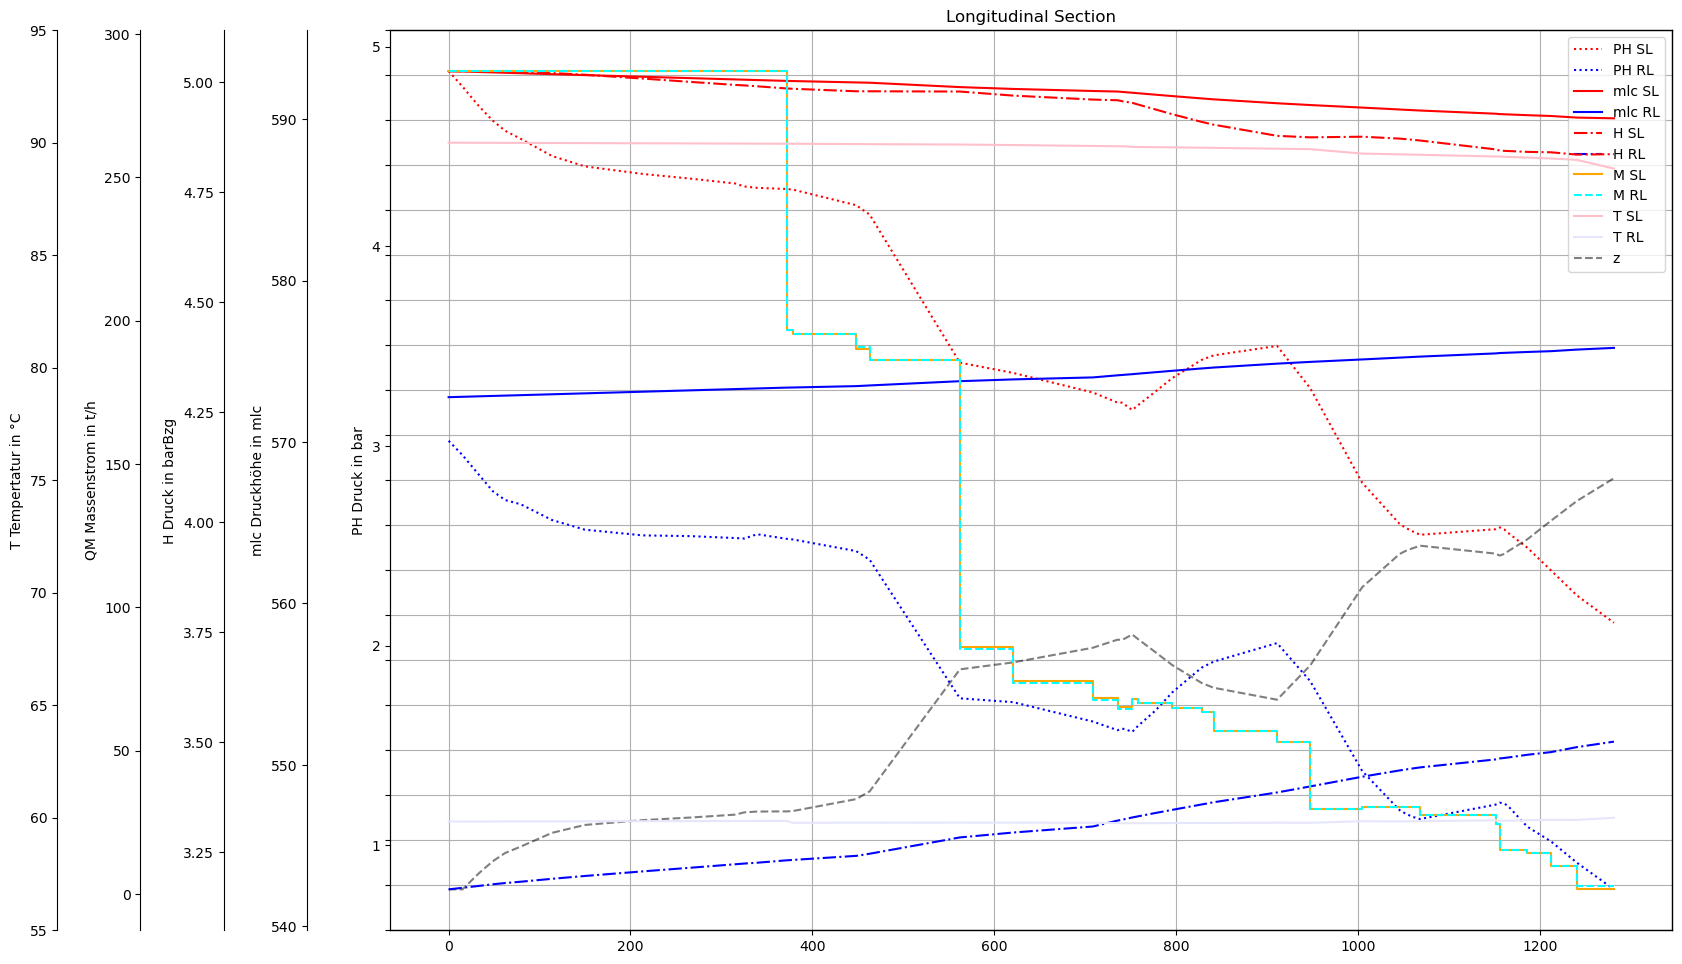

In [16]:
fig, ax0 = plt.subplots(figsize=Rm.DINA3q)

plot(ax0,dfAGSN,dfAGSNRL)

# V3_AGSN: Columns

In [17]:
m.V3_AGSN.columns.to_list()

['Pos',
 'pk',
 'tk',
 'LFDNR',
 'NAME',
 'XL',
 'compNr',
 'nextNODE',
 'OBJTYPE',
 'OBJID',
 'L',
 'DN',
 'Am2',
 'Vm3',
 'NAME_CONT',
 'NAME_i',
 'NAME_k',
 'ZKOR_n',
 'BESCHREIBUNG_n',
 'KVR_n',
 'LSum',
 'direction',
 ('STAT',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TIME',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TMIN',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 ('TMAX',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 'QM',
 "('STAT', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TIME', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TMIN', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('TMAX', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('STA

# V3_ROHRVEC (pipe interior points): Columns

In [18]:
m.V3_ROHRVEC.columns.to_list()

['pk',
 'fkDE',
 'rk',
 'tk',
 'fkKI',
 'fkKK',
 'fkDTRO_ROWD',
 'fkLTGR',
 'fkSTRASSE',
 'L',
 'LZU',
 'RAU',
 'JLAMBS',
 'LAMBDA0',
 'ZEIN',
 'ZAUS',
 'ZUML',
 'ASOLL',
 'INDSCHALL',
 'BAUJAHR',
 'HAL',
 'fkCONT',
 'fk2LROHR',
 'BESCHREIBUNG',
 'GEOMWKB',
 'DELETED',
 'SELECT1',
 'IDREFERENZ',
 'KENNUNG',
 'IPLANUNG',
 'KVR',
 'pk_BZ',
 'fkDE_BZ',
 'fk',
 'QSVB',
 'IRTRENN',
 'LECKSTATUS',
 'LECKSTART',
 'LECKEND',
 'LECKORT',
 'LECKMENGE',
 'IMPTNZ',
 'ZVLIMPTNZ',
 'KANTENZV',
 'GEOM',
 'GRAF',
 'MId',
 'MText',
 'Basis',
 'Variante',
 'BZ',
 'Geaendert',
 'Erstellt',
 'pk_VMBZ',
 'fkBASIS',
 'fkVARIANTE',
 'fkBZ',
 'MZ',
 'MT',
 'pk_CONT',
 'fkDE_CONT',
 'rk_CONT',
 'tk_CONT',
 'ID_CONT',
 'NAME_CONT',
 'IDPARENT_CONT',
 'rkPARENT_CONT',
 'LFDNR_CONT',
 'GRAF_CONT',
 'FONT_CONT',
 'GEOM_CONT',
 'DELETED_CONT',
 'SELECT1_CONT',
 'IDREFERENZ_CONT',
 'NAME_DTRO',
 'DN',
 'DI',
 'DA',
 'S',
 'KT',
 'PN',
 'Am2',
 'Vm3',
 'NAME_LTGR',
 'NAME_STRASSE',
 'tk_i',
 'NAME_i',
 'tk_k',
 'NAME

In [19]:
m.V3_ROHRVEC.shape

(1184, 294)

In [20]:
pd.set_option('display.max_rows', None)

# V3_AGSNVec: Longitudinal Sections with pipe interior points: Columns

In [21]:
dfAGSNVec=m.V3_AGSNVEC

In [22]:
dfAGSNVec.head()

,Pos,pk,tk,LFDNR,NAME,XL,compNr,nextNODE,OBJTYPE,OBJID,...,"(TMAX, mlcPVEC, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, barBzgPVEC, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, manPVECMAX_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, mlcPVECMAX_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, barBzgPVECMAX_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, manPVECMIN_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, mlcPVECMIN_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, barBzgPVECMIN_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, QMVEC, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, tMVEC, 2023-02-12 23:00:00, 2023-02-13 23:00:00)"
2,0,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-E0,ROHR,5691533564979419761,...,602.571157,5.927689,5.786535,602.571157,5.927689,4.87839,592.985013,5.019544,557.322756,538.206592
3,0,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1683S,ROHR,5691533564979419761,...,602.48761,5.919782,5.70284,602.48761,5.919782,4.800115,592.958688,5.017056,557.322086,538.206592
5,1,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1693S,ROHR,5048873293262650113,...,602.419526,5.913338,5.63008,602.419526,5.913338,4.73177,592.937222,5.015028,557.321523,538.206592
7,2,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2163S,ROHR,5715081934973525403,...,602.385379,5.910106,5.594635,602.385379,5.910106,4.69854,592.926454,5.01401,-297.286218,-287.090085
9,3,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2043S,ROHR,5413647981880727734,...,602.306946,5.902682,5.520895,602.306946,5.902682,4.6299,592.901869,5.011687,-297.28588,-287.090085


In [23]:
dfAGSNVec.columns.to_list()

['Pos',
 'pk',
 'tk',
 'LFDNR',
 'NAME',
 'XL',
 'compNr',
 'nextNODE',
 'OBJTYPE',
 'OBJID',
 'L',
 'DN',
 'Am2',
 'Vm3',
 'NAME_CONT',
 'NAME_i',
 'NAME_k',
 'ZKOR_n',
 'BESCHREIBUNG_n',
 'KVR_n',
 'LSum',
 'direction',
 ('STAT',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TIME',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TMIN',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 ('TMAX',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 'QM',
 "('STAT', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TIME', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TMIN', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('TMAX', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('STA

# V3_AGSNVec's columns from Multiindex-perspective

In [24]:
dfAGSNVec=dfAGSNVec.copy(deep=True)

In [25]:
dfAGSNVec.columns=pd.MultiIndex.from_tuples(
                [dxAndMxHelperFcts.fGetMultiindexTupleFromV3Col(col) for col in dfAGSNVec.columns.to_list()]
                ,names=['1','2','3','4'])   

In [26]:
sorted([col for col in list(set(dfAGSNVec.columns.get_level_values(level=1).to_list())) if not pd.isnull(col)])

['KNOT~*~*~*~H_i',
 'KNOT~*~*~*~H_k',
 'KNOT~*~*~*~H_n',
 'KNOT~*~*~*~PH_i',
 'KNOT~*~*~*~PH_k',
 'KNOT~*~*~*~PH_n',
 'KNOT~*~*~*~RHO_i',
 'KNOT~*~*~*~RHO_k',
 'KNOT~*~*~*~RHO_n',
 'KNOT~*~*~*~T_i',
 'KNOT~*~*~*~T_k',
 'KNOT~*~*~*~T_n',
 'QM',
 'QMVEC',
 'ROHR~*~*~*~A',
 'ROHR~*~*~*~DTTR',
 'ROHR~*~*~*~DWVERL',
 'ROHR~*~*~*~DWVERLABS',
 'ROHR~*~*~*~IAKTIV',
 'ROHR~*~*~*~IRTRENN',
 'ROHR~*~*~*~JV',
 'ROHR~*~*~*~MVEC',
 'ROHR~*~*~*~PDAMPF',
 'ROHR~*~*~*~PHR',
 'ROHR~*~*~*~PMIN',
 'ROHR~*~*~*~PVEC',
 'ROHR~*~*~*~PVECMAX_INST',
 'ROHR~*~*~*~PVECMIN_INST',
 'ROHR~*~*~*~QMAV',
 'ROHR~*~*~*~QMI',
 'ROHR~*~*~*~QMK',
 'ROHR~*~*~*~RHOI',
 'ROHR~*~*~*~RHOK',
 'ROHR~*~*~*~RHOVEC',
 'ROHR~*~*~*~TI',
 'ROHR~*~*~*~TK',
 'ROHR~*~*~*~TTRVEC',
 'ROHR~*~*~*~TVEC',
 'ROHR~*~*~*~VAV',
 'ROHR~*~*~*~VI',
 'ROHR~*~*~*~VK',
 'ROHR~*~*~*~VOLDA',
 'ROHR~*~*~*~WVL',
 'barBzgPVEC',
 'barBzgPVECMAX_INST',
 'barBzgPVECMIN_INST',
 'manPVEC',
 'manPVECMAX_INST',
 'manPVECMIN_INST',
 'mlcPVEC',
 'mlcPVECMAX_INST',
 'ml

In [27]:
sorted([col for col in list(set(dfAGSNVec.columns.get_level_values(level=0).to_list())) if not pd.isnull(col)])

['ASOLL',
 'Am2',
 'Am2_ROHRVEC',
 'BAUJAHR',
 'BESCHREIBUNG',
 'BESCHREIBUNG_n',
 'BZ',
 'Basis',
 'DA',
 'DELETED',
 'DELETED_CONT',
 'DI',
 'DN',
 'DN_ROHRVEC',
 'Erstellt',
 'FONT_CONT',
 'GEOM',
 'GEOMWKB',
 'GEOM_CONT',
 'GRAF',
 'GRAF_CONT',
 'Geaendert',
 'HAL',
 'H_n',
 'IDPARENT_CONT',
 'IDREFERENZ',
 'IDREFERENZ_CONT',
 'ID_CONT',
 'IMPTNZ',
 'INDSCHALL',
 'IPLANUNG',
 'IRTRENN',
 'IptIdx',
 'IptIdxAsNo',
 'JLAMBS',
 'JVAbs',
 'KANTENZV',
 'KENNUNG',
 'KT',
 'KVR',
 'KVR_n',
 'L',
 'LAMBDA0',
 'LECKEND',
 'LECKMENGE',
 'LECKORT',
 'LECKSTART',
 'LECKSTATUS',
 'LFDNR',
 'LFDNR_CONT',
 'LSum',
 'LZU',
 'L_ROHRVEC',
 'MId',
 'MT',
 'MText',
 'MZ',
 'NAME',
 'NAME_CONT',
 'NAME_CONT_ROHRVEC',
 'NAME_DTRO',
 'NAME_LTGR',
 'NAME_STRASSE',
 'NAME_i',
 'NAME_i_ROHRVEC',
 'NAME_k',
 'NAME_k_ROHRVEC',
 'OBJID',
 'OBJTYPE',
 'PHRAbs',
 'PH_n',
 'PN',
 'Pos',
 'QM',
 'QMAVAbs',
 'QSVB',
 'RAU',
 'RHO_n',
 'S',
 'SELECT1',
 'SELECT1_CONT',
 'STAT',
 'SVEC',
 'TIME',
 'TMAX',
 'TMIN',
 'T

In [28]:
sorted([col for col in list(set(dfAGSNVec.columns.get_level_values(level=2).to_list())) if not pd.isnull(col)])

[Timestamp('2023-02-12 23:00:00')]

In [29]:
sorted([col for col in list(set(dfAGSNVec.columns.get_level_values(level=3).to_list())) if not pd.isnull(col)])

[Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00')]

# Examination of V3_AGSNVec

In [30]:
m.V3_AGSNVEC.head()

,Pos,pk,tk,LFDNR,NAME,XL,compNr,nextNODE,OBJTYPE,OBJID,...,"(TMAX, mlcPVEC, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, barBzgPVEC, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, manPVECMAX_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, mlcPVECMAX_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, barBzgPVECMAX_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, manPVECMIN_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, mlcPVECMIN_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, barBzgPVECMIN_INST, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, QMVEC, 2023-02-12 23:00:00, 2023-02-13 23:00:00)","(TMAX, tMVEC, 2023-02-12 23:00:00, 2023-02-13 23:00:00)"
2,0,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-E0,ROHR,5691533564979419761,...,602.571157,5.927689,5.786535,602.571157,5.927689,4.87839,592.985013,5.019544,557.322756,538.206592
3,0,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1683S,ROHR,5691533564979419761,...,602.48761,5.919782,5.70284,602.48761,5.919782,4.800115,592.958688,5.017056,557.322086,538.206592
5,1,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1693S,ROHR,5048873293262650113,...,602.419526,5.913338,5.63008,602.419526,5.913338,4.73177,592.937222,5.015028,557.321523,538.206592
7,2,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2163S,ROHR,5715081934973525403,...,602.385379,5.910106,5.594635,602.385379,5.910106,4.69854,592.926454,5.01401,-297.286218,-287.090085
9,3,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2043S,ROHR,5413647981880727734,...,602.306946,5.902682,5.520895,602.306946,5.902682,4.6299,592.901869,5.011687,-297.28588,-287.090085


In [31]:
m.V3_AGSNVEC['IptIdx'].unique()

array(['S', 'E', 0], dtype=object)

## Section No. 1

In [32]:
dfAGSNVec=m.V3_AGSNVEC[
    (m.V3_AGSNVEC['LFDNR']==1)
    &
    (m.V3_AGSNVEC['XL']==1)
]


In [33]:
dfAGSNVecRL=m.V3_AGSNVEC[
 (m.V3_AGSNVEC['LFDNR']==1)
    &
    (m.V3_AGSNVEC['XL']==2)
]

In [34]:
dfAGSN[colsAGSNBase+['nextNODE','PH_n','mlc_n','T_n']]

,LFDNR,XL,Pos,OBJTYPE,OBJID,DN,NAME_i,NAME_k,QM,direction,L,LSum,nextNODE,PH_n,mlc_n,T_n
88,1.0,1,-1,ROHR,5691533564979419761,350,V-E0,V-K1683S,287.090057,1,0.000000,0.000000,V-E0,4.878388,592.984993,90.0
88,1.0,1,0,ROHR,5691533564979419761,350,V-E0,V-K1683S,287.090057,1,15.351701,15.351701,V-K1683S,4.800117,592.958713,89.998016
89,1.0,1,1,ROHR,5048873293262650113,350,V-K1683S,V-K1693S,287.090057,1,12.508947,27.860648,V-K1693S,4.731768,592.937202,89.996399
90,1.0,1,2,ROHR,5715081934973525403,350,V-K2163S,V-K1693S,-287.090057,-1,6.265505,34.126153,V-K2163S,4.698539,592.926449,89.995605
91,1.0,1,3,ROHR,5413647981880727734,350,V-K2043S,V-K2163S,-287.090057,-1,14.407541,48.533695,V-K2043S,4.629901,592.901884,89.993744
92,1.0,1,4,ROHR,5134010500800575790,350,V-K2033S,V-K2043S,-287.090057,-1,13.515843,62.049538,V-K2033S,4.579439,592.879114,89.992004
93,1.0,1,5,ROHR,4703401536268630837,350,V-K833S,V-K2033S,-287.090057,-1,17.274715,79.324254,V-K833S,4.538838,592.8505,89.989777
94,1.0,1,6,ROHR,4756919352045195395,350,V-K833S,V-K843S,287.090057,1,34.342167,113.666420,V-K843S,4.452928,592.793504,89.985352
95,1.0,1,7,ROHR,4950699445422043390,350,V-K843S,V-K853S,287.090057,1,36.085915,149.752335,V-K853S,4.400915,592.73439,89.980713
96,1.0,1,8,ROHR,5443612009555325057,350,V-K853S,V-K863S,287.090057,1,64.030151,213.782486,V-K863S,4.362684,592.630591,89.972443


In [35]:
dfAGSNVec[colsAGSNBase+['nextNODE','PH_n','mlc_n','T_n']+['IptIdx','IptIdxAsNo','SVEC','ZKOR_n']]

,LFDNR,XL,Pos,OBJTYPE,OBJID,DN,NAME_i,NAME_k,QM,direction,L,LSum,nextNODE,PH_n,mlc_n,T_n,IptIdx,IptIdxAsNo,SVEC,ZKOR_n
198,1.0,1,0,ROHR,5691533564979419761,350,V-E0,V-K1683S,297.287026,1,15.351701,0.000000,V-E0,4.878390,592.985013,90.000000,S,0,0.000000,541.489990
199,1.0,1,0,ROHR,5691533564979419761,350,V-E0,V-K1683S,297.286669,1,15.351701,15.351701,V-K1683S,4.800115,592.958688,89.998016,E,1,15.351701,542.289978
201,1.0,1,1,ROHR,5048873293262650113,350,V-K1683S,V-K1693S,297.286369,1,12.508947,27.860648,V-K1693S,4.731770,592.937222,89.996399,E,1,12.508947,542.989990
203,1.0,1,2,ROHR,5715081934973525403,350,V-K2163S,V-K1693S,-297.286218,-1,6.265505,34.126153,V-K2163S,4.698540,592.926454,89.995605,S,1,6.265505,543.330017
205,1.0,1,3,ROHR,5413647981880727734,350,V-K2043S,V-K2163S,-297.285880,-1,14.407541,48.533695,V-K2043S,4.629900,592.901869,89.993744,S,1,14.407541,544.030029
207,1.0,1,4,ROHR,5134010500800575790,350,V-K2033S,V-K2043S,-297.285542,-1,13.515843,62.049538,V-K2033S,4.579440,592.879119,89.992004,S,1,13.515843,544.539978
209,1.0,1,5,ROHR,4703401536268630837,350,V-K833S,V-K2033S,-297.285147,-1,17.274715,79.324254,V-K833S,4.538840,592.850520,89.989777,S,1,17.274715,544.940002
211,1.0,1,6,ROHR,4756919352045195395,350,V-K833S,V-K843S,297.284321,1,34.342167,113.666420,V-K843S,4.452925,592.793474,89.985352,E,1,34.342167,545.789978
213,1.0,1,7,ROHR,4950699445422043390,350,V-K843S,V-K853S,297.283456,1,36.085915,149.752335,V-K853S,4.400915,592.734390,89.980713,E,1,36.085915,546.280029
215,1.0,1,8,ROHR,5443612009555325057,350,V-K853S,V-K863S,297.282686,1,64.030151,181.767411,V-K863S,4.381800,592.682524,89.976593,0,1,32.015076,546.430054


## Plot

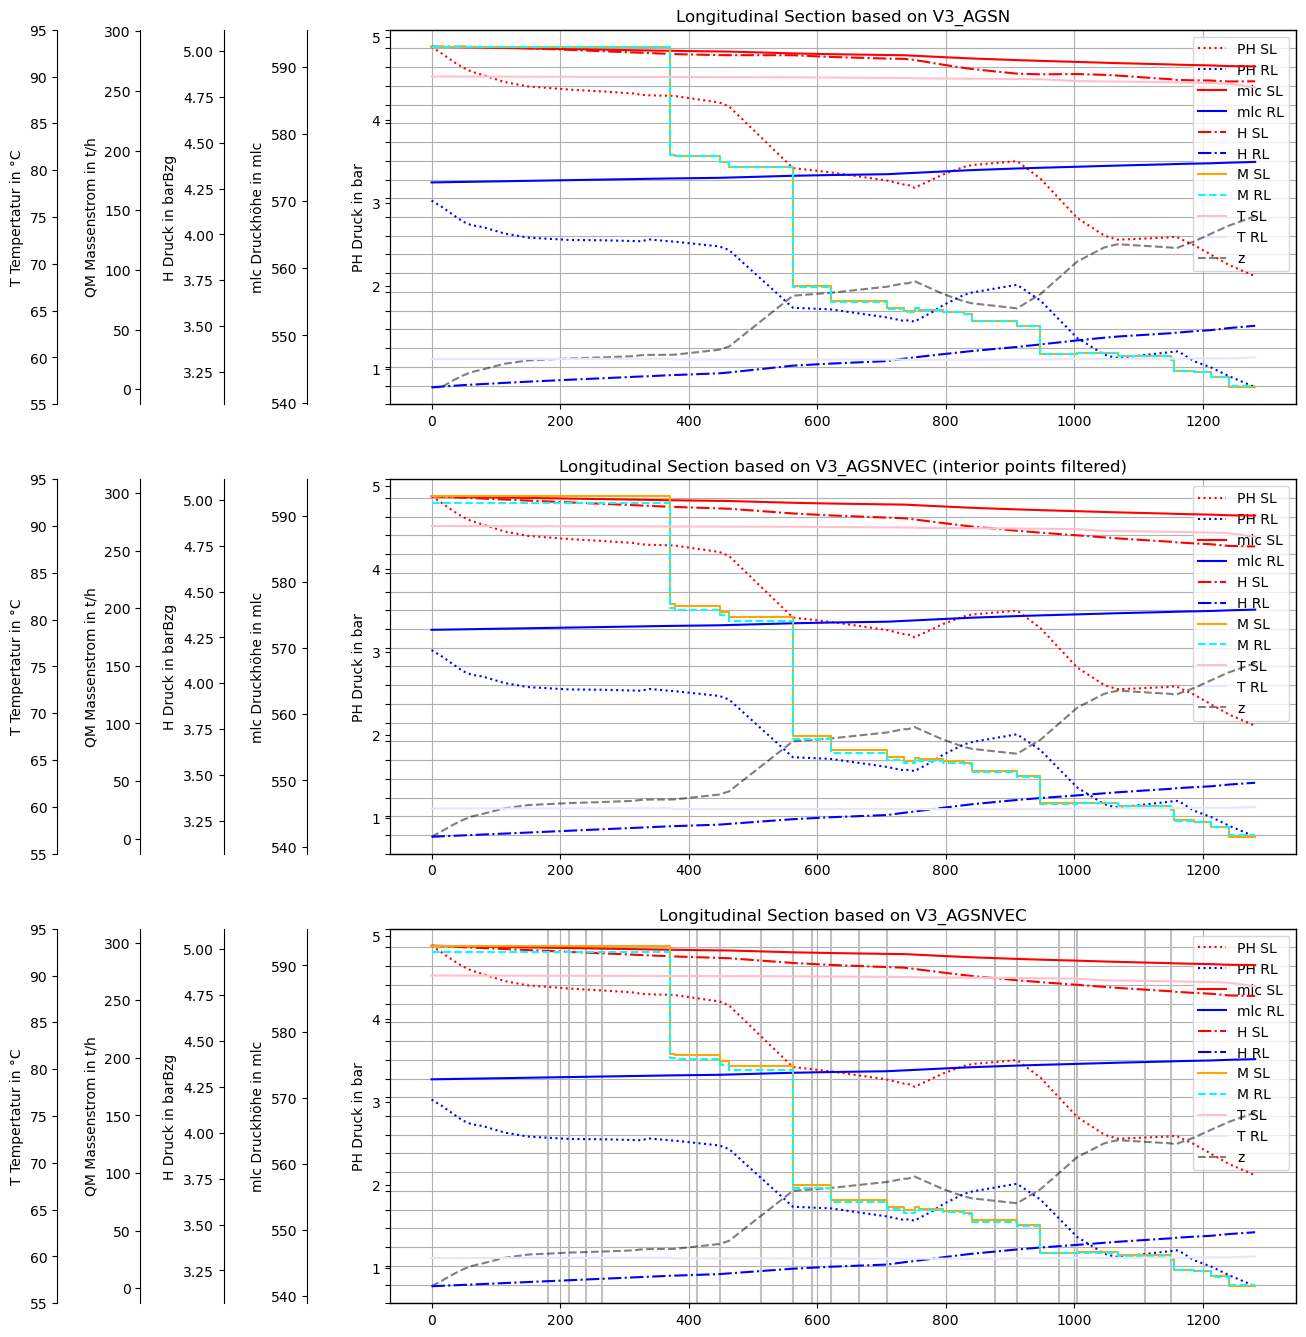

In [36]:
fig, axs = plt.subplots(nrows=3,ncols=1,figsize=Rm.DINA3)

plot(axs[0],dfAGSN,dfAGSNRL,title='Longitudinal Section based on V3_AGSN')
plot(axs[1],dfAGSNVec[dfAGSNVec['IptIdx'].isin(['S','E'])],dfAGSNVecRL[dfAGSNVecRL['IptIdx'].isin(['S','E'])],title='Longitudinal Section based on V3_AGSNVEC (interior points filtered)')
plot(axs[2],dfAGSNVec,dfAGSNVecRL,title='Longitudinal Section based on V3_AGSNVEC')

dfAGSNVecAnzIptx=dfAGSNVec.groupby(by=['LFDNR','XL','OBJID'])['Pos'].count()
for index,row in dfAGSNVec.iterrows():
    pass
    if row['Pos']==0:
        continue
    if dfAGSNVecAnzIptx.loc[(row['LFDNR'],row['XL'],row['OBJID'])]>=2:
        axs[2].axvline(x=row['LSum'],c='silver')